In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Input,MaxPooling2D,Dropout
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/gdrive/My Drive"))
style.use('ggplot')
%matplotlib notebook

['IDC_regular_ps50_idx5', 'Colab Notebooks', 'CBIS-DDSM final train_test mammogram data', 'CBIS-DDSM final cancer_normal mammogram data', 'full_CBIS-DDSM dataset']


In [ ]:
base_dir = '/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data'

#train autoencoder files
train_dir = os.path.join(base_dir,'train')

#train classification model files
test_dir = os.path.join(base_dir,'test')

train_cats = os.path.join(train_dir,'cancer')
train_dogs = os.path.join(train_dir,'normal')

test_cats = os.path.join(test_dir,'cancer')
test_dogs = os.path.join(test_dir,'normal')

#get filenames
train_cats_fnames = os.listdir(train_cats)
train_dogs_fnames = os.listdir(train_dogs)

(4712, 2648, 3)
(5888, 3000, 3)


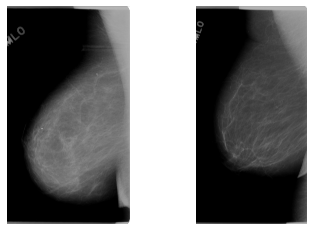

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

pic = [os.path.join(train_cats, train_cats_fnames[0])]
pic2 = [os.path.join(train_dogs, train_dogs_fnames[0])]

for i, img in enumerate(pic + pic2):
    ax = plt.subplot(1,2,i+1)
    image = mpimg.imread(img)
    ax.axis('off')
    plt.imshow(image)
    print(image.shape)

In [ ]:
input_img = Input(shape=(128,128, 3)) #RGB image

#encoder
x = Conv2D(16,(3,3),activation='relu',padding='same',)(input_img)
#x = MaxPooling2D(2,padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
#x = MaxPooling2D(2,padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)

encoded= Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# fully connected layer with output
model = Flatten()(encoded)
model = Dense(1024, activation='elu')(model)
model = keras.layers.BatchNormalization()(model)
model = Dropout(0.5)(model)
model = Dense(2,activation='sigmoid')(model) #output
#MaxPooling2D(2,padding='same')(x)
model1=Model(input_img, model)
model1.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 128, 128, 8)       1160      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 128, 128, 8)       584       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 128, 128, 3)       219       
_________________________________________________________________
flatten_11 (Flatten)         (None, 49152)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 1024)              503

In [ ]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    
    Flatten(),
    Dense(256, activation="relu"),
    Dense(2, activation='softmax')
  
])

In [ ]:

model2.compile(optimizer='ADAM', loss='binary_crossentropy')
#model2.add(BatchNormalization())

In [ ]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 12, 12, 256)     

In [ ]:
from tensorflow.keras.layers import *
print(model.shape)
print(model2.output.shape)
merged = concatenate([model,model2.output])

(None, 2)
(None, 2)


In [ ]:
merged = Flatten()(merged)    
#merged = Dense(256, activation='relu')(merged)
#merged = Dropout(.5)(merged)
merged = Dense(128, activation='relu')(merged)
#merged = Dropout(.35)(merged)

# output layer
merged = Dense(5, activation='softmax')(merged)

In [ ]:
output = Dense(3, activation='softmax')(merged)


In [ ]:
newModel = Model([model1.input,model2.input],output)


In [ ]:

newModel.compile(metrics=['acc'], loss='binary_crossentropy',optimizer ='adam')
newModel.summary()
#newModel.compile(optimizer='adam', loss='mse',metrics=['accuracy'])


#newModel.summary()
#early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
#history1 = newModel.fit([train_x,data],train_y,batch_size=batch_size,epochs=epochs,verbose=1)

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_73_input (InputLayer)    [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_73 (Conv2D)              (None, 126, 126, 32) 896         conv2d_73_input[0][0]            
__________________________________________________________________________________________________
input_14 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
max_pooling2d_47 (MaxPooling2D) (None, 63, 63, 32)   0           conv2d_73[0][0]                  
___________________________________________________________________________________________

In [ ]:
batch_size = 16
epochs =10
#early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
history1 = newModel.fit([train_x,data],y=np.array(train_y),batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
#history1 = newModel.fit([train_x,data],train_y, batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/10
42/42 [==============================] - 3s 77ms/step - loss: 0.7731 - acc: 0.2629 - val_loss: 0.7333 - val_acc: 0.4730
Epoch 2/10
42/42 [==============================] - 3s 70ms/step - loss: 0.7731 - acc: 0.3526 - val_loss: 0.7333 - val_acc: 0.4730
Epoch 3/10
42/42 [==============================] - 3s 71ms/step - loss: 0.7731 - acc: 0.3100 - val_loss: 0.7333 - val_acc: 0.4730
Epoch 4/10
42/42 [==============================] - 3s 70ms/step - loss: 0.7731 - acc: 0.3997 - val_loss: 0.7333 - val_acc: 0.4730
Epoch 5/10
42/42 [==============================] - 3s 70ms/step - loss: 0.7731 - acc: 0.3647 - val_loss: 0.7333 - val_acc: 0.4730
Epoch 6/10
42/42 [==============================] - 3s 70ms/step - loss: 0.7731 - acc: 0.3769 - val_loss: 0.7333 - val_acc: 0.4730
Epoch 7/10
42/42 [==============================] - 3s 71ms/step - loss: 0.7731 - acc: 0.3875 - val_loss: 0.7333 - val_acc: 0.4730
Epoch 8/10
42/42 [==============================] - 3s 70ms/step - loss: 0.7731 - a

In [ ]:
accuracy = history1.history['acc']
loss = history1.history['loss']
val_accuracy = history1.history['val_acc']
val_loss = history1.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.41033434867858887
Training Loss: 0.7731069326400757
Validation Accuracy: 0.47297295928001404
Validation Loss: 0.7333055138587952


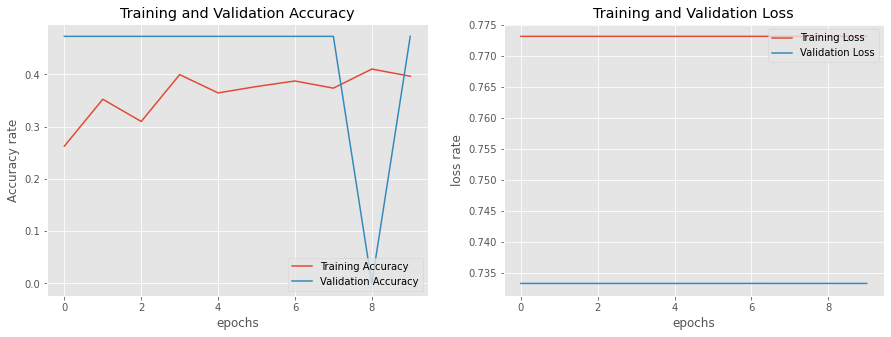

In [ ]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('Accuracy rate')
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss rate')
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
predictions = newModel.predict([test_data,test_data]).argmax( axis=-1 ) 

In [ ]:
print(len(predictions))
#pred.resize(10,1)
print ( predictions )

366
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, predictions,
                                           average='micro'))

Precision Score :  0.45081967213114754


In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

print('F1_score : ',f1_score(test_labels,predictions,average='micro'))
print('sensitibity : ',metrics.recall_score(test_labels,predictions,average='micro'))

F1_score :  0.4508196721311476
sensitibity :  0.45081967213114754


In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.48      0.88      0.62       187
           2       0.00      0.00      0.00         0

    accuracy                           0.45       366
   macro avg       0.16      0.29      0.21       366
weighted avg       0.25      0.45      0.32       366



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_labels,predictions)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_labels,predictions) 
print(auc_score) 
print(matthews_corrcoef(test_labels,predictions))